
***
# Project Title: Influenza Genome Sequence Trajectories
*BMI6106, Wrangling Sixers Group Project, github repository: https://github.com/sukrut56/Data_Wrangling_Project*
***

## Part 1: Data Cleaning
Team members: Sukrut and Hannah

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data
raw_data = pd.read_csv("gisaid_epiflu_isolates_human.csv")
raw_data.head()

C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\1853919025.py:6: DtypeWarning: Columns (10,11,22,45,46,47,53,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("gisaid_epiflu_isolates_human.csv")


,Unnamed: 0,Isolate_Id,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id,...,PB2 INSDC_Upload,PB1 INSDC_Upload,PA INSDC_Upload,HA INSDC_Upload,NP INSDC_Upload,NA INSDC_Upload,MP INSDC_Upload,NS INSDC_Upload,HE INSDC_Upload,P3 INSDC_Upload
0,0,EPI_ISL_16810976,NaN,NaN,NaN,EPI2352050|489-H1N1-HANA_HA1,NaN,EPI2352043|489-H1N1-HANA_NA1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,EPI_ISL_16647787,NaN,EPI2312582|A/South Africa/R06539/2022,EPI2312581|A/South Africa/R06539/2022,EPI2312579|A/South Africa/R06539/2022,NaN,EPI2312580|A/South Africa/R06539/2022,EPI2312584|A/South Africa/R06539/2022,EPI2312583|A/South Africa/R06539/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,EPI_ISL_16647783,EPI2312576|A/South Africa/R05932/2022,EPI2312575|A/South Africa/R05932/2022,EPI2312574|A/South Africa/R05932/2022,EPI2312567|A/South Africa/R05932/2022,EPI2312577|A/South Africa/R05932/2022,EPI2312570|A/South Africa/R05932/2022,EPI2312578|A/South Africa/R05932/2022,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,EPI_ISL_16647781,EPI2312562|A/South Africa/R05856/2022,EPI2312561|A/South Africa/R05856/2022,EPI2312560|A/South Africa/R05856/2022,EPI2312555|A/South Africa/R05856/2022,EPI2312558|A/South Africa/R05856/2022,EPI2312557|A/South Africa/R05856/2022,EPI2312556|A/South Africa/R05856/2022,EPI2312559|A/South Africa/R05856/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,EPI_ISL_16647739,EPI2312550|A/South Africa/R07669/2022,EPI2312549|A/South Africa/R07669/2022,EPI2312551|A/South Africa/R07669/2022,EPI2312547|A/South Africa/R07669/2022,EPI2312554|A/South Africa/R07669/2022,EPI2312548|A/South Africa/R07669/2022,EPI2312552|A/South Africa/R07669/2022,EPI2312553|A/South Africa/R07669/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing and Unknown Values
Some columns have 'Unknown' listed rather than missing values. 

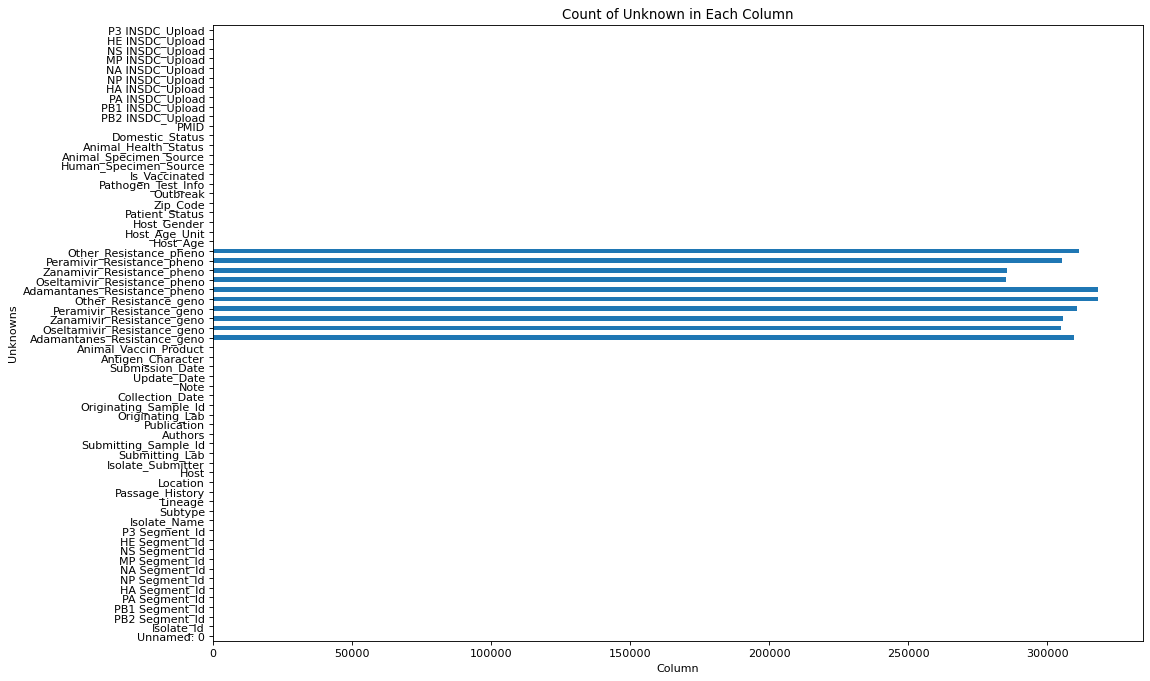

In [2]:
# Create a dictionary to hold the counts of 'Unknowns' for each column
counts = {}
for column_name in raw_data.columns:
    column = raw_data[column_name]
    count = (column == 'Unknown').sum()
    counts[column_name] = count

# Convert the dictionary to a pandas Series and plot a bar graph
plt.figure(figsize=(15, 10), dpi=80)
counts_series = pd.Series(counts)
counts_series.plot(kind='barh')
plt.xlabel('Column')
plt.ylabel('Unknowns')
plt.title('Count of Unknown in Each Column')
plt.show()

These appear to be only the drug resistance columns. The values are either Resistant, Susceptible, Inconclusive, or Unknown. These can be converted to NaN for this purpose to show all unknown values in one plot. 

In [3]:
# Get counts for all value types for drug resistance data
raw_data.iloc[:, 31:41].apply(pd.value_counts)

,Adamantanes_Resistance_geno,Oseltamivir_Resistance_geno,Zanamivir_Resistance_geno,Peramivir_Resistance_geno,Other_Resistance_geno,Adamantanes_Resistance_pheno,Oseltamivir_Resistance_pheno,Zanamivir_Resistance_pheno,Peramivir_Resistance_pheno,Other_Resistance_pheno
Inconclusive,NaN,8,11,NaN,NaN,NaN,16,14,NaN,NaN
Resistant,8814.0,562,35,411.0,8.0,292.0,517,29,303.0,7.0
Sensitive,125.0,13236,12879,7622.0,260.0,258.0,32929,32979,12951.0,7161.0
Unknown,309771.0,304904,305785,310677.0,318442.0,318160.0,285248,285688,305456.0,311542.0


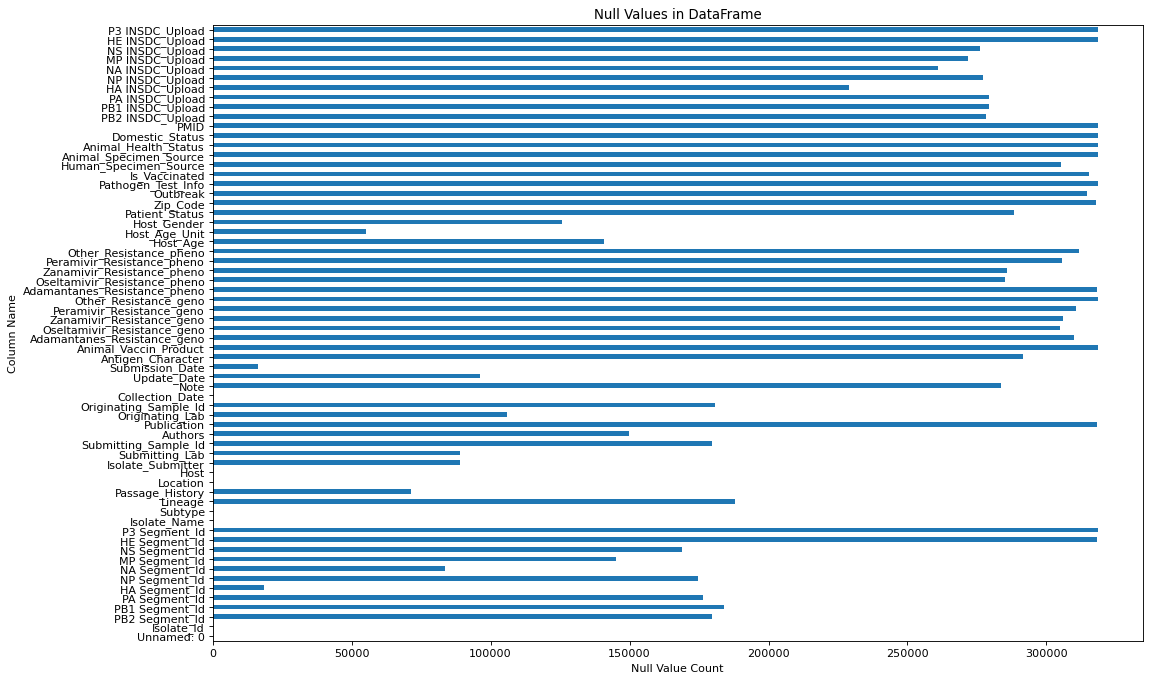

In [4]:
# Much of the drug resistance data is unknown. Convert to NaN values. 
mod1 = raw_data.copy()
mod1.replace('Unknown', np.nan, inplace = True)

# Get null value totals
null = mod1.isnull().sum()
plt.figure(figsize=(15, 10), dpi=80)
null.plot(kind='barh')
plt.title('Null Values in DataFrame')
plt.xlabel('Null Value Count')
plt.ylabel('Column Name')
plt.show()

### Feature Selection
Decide which columns are useful and not. Some columns may be useful when the genomic data comes into play, but not necessarily for the subtype tracking. Create lists of columns to be dropped grouped by data type in case future reference is needed. 

In [5]:
# Sample info. Information regarding the submitting party and sample collection
sample_info_columns = ['Isolate_id', 'Isolate_Submitter', 'Submitting_Lab', 'Authors', 'Publication',
                       'Originating_Lab', 'Submitting_Sample_Id', 'Originating_Sample_Id', 'Passage_History',
                       'Note', 'PMID', 'Submission_Date', 'Update_Date']

phenotype_info = ['Antigen_Character', 'Animal_Vaccin_Product', 'Adamantanes_Resistance_geno',
                  'Oseltamivir_Resistance_geno', 'Zanamivir_Resistance_geno', 'Peramivir_Resistance_geno',
                  'Other_Resistance_geno', 'Adamantanes_Resistance_pheno', 'Oseltamivir_Resistance_pheno',
                  'Zanamivir_Resistance_pheno', 'Peramivir_Resistance_pheno', 'Other_Resistance_pheno']

patient_info = ['Host_Age', 'Host_Age_Unit', 'Host_Gender', 'Patient_Status', 'Zip_Code', 
                'Is_Vaccinated', 'Human_Specimen_Source', 'Outbreak', 'Pathogen_Test_Info' ,'Animal_Specimen_Source',
                'Animal_Health_Status', 'Domestic_Status']

genbank_columns = ['PMID', 'PB2 INSDC_Upload', 'PB1 INSDC_Upload', 'PA INSDC_Upload', 'HA INSDC_Upload', 
                   'NP INSDC_Upload', 'NA INSDC_Upload', 'MP INSDC_Upload',
                   'NS INSDC_Upload', 'HE INSDC_Upload', 'P3 INSDC_Upload']

segments = ['Isolate_Id', 'PB2 Segment_Id', 'PB1 Segment_Id', 'PA Segment_Id', 'HA Segment_Id', 'NP Segment_Id', 'NA Segment_Id', 'MP Segment_Id', 'NS Segment_Id']

# HE and P3 segments are specific to influenza C which I believe we are not including
#, 'HE Segment_Id', 'P3 Segment_Id'

# I don't think we should drop these
# 'PB2 Segment_Id', 'PB1 Segment_Id', 'PA Segment_Id', 'HA Segment_Id', 'NP Segment_Id', 'NA Segment_Id', 'MP Segment_Id','HE Segment_Id', 'P3 Segment_Id', 'NS Segment_Id'

print(type(mod1))
mod2 = mod1.drop(['Isolate_Submitter', 'Submitting_Lab', 'Authors', 'Publication', 'Originating_Lab', 'Note', 'Antigen_Character',
           'Animal_Vaccin_Product', 'Adamantanes_Resistance_geno', 'Oseltamivir_Resistance_geno', 'Zanamivir_Resistance_geno',
           'Peramivir_Resistance_geno', 'Other_Resistance_geno', 'Adamantanes_Resistance_pheno', 'Oseltamivir_Resistance_pheno',
           'Zanamivir_Resistance_pheno', 'Peramivir_Resistance_pheno', 'Other_Resistance_pheno', 'Host_Age', 'Host_Age_Unit',
           'Host_Gender', 'Patient_Status', 'Zip_Code', 'Outbreak', 'Pathogen_Test_Info', 'Is_Vaccinated', 'Human_Specimen_Source',
           'Animal_Specimen_Source', 'Animal_Health_Status', 'Domestic_Status', 'PMID', 'PB2 INSDC_Upload', 'PB1 INSDC_Upload',
           'PA INSDC_Upload', 'HA INSDC_Upload', 'NP INSDC_Upload', 'NA INSDC_Upload', 'MP INSDC_Upload', 'NS INSDC_Upload',
           'HE INSDC_Upload', 'P3 INSDC_Upload', 'Submitting_Sample_Id', 'Originating_Sample_Id','Host', 'Passage_History', 'Update_Date'], 
          axis=1)
cols = mod2.columns.tolist()

cols = ['Isolate_Id', 'Isolate_Name', 'Subtype', 'Lineage', 'Location', 'Collection_Date',
            'PB2 Segment_Id', 'PB1 Segment_Id', 'PA Segment_Id', 'HA Segment_Id', 'NP Segment_Id',
            'NA Segment_Id', 'MP Segment_Id', 'NS Segment_Id']

mod2 = mod2[cols]

mod2.head()

<class 'pandas.core.frame.DataFrame'>


,Isolate_Id,Isolate_Name,Subtype,Lineage,Location,Collection_Date,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id
0,EPI_ISL_16810976,A/Petrozavodsk/CRIE/489/2023,A / H1N1,pdm09,Europe / Russian Federation / Republic of Karelia,2022-01-03,NaN,NaN,NaN,EPI2352050|489-H1N1-HANA_HA1,NaN,EPI2352043|489-H1N1-HANA_NA1,NaN,NaN
1,EPI_ISL_16647787,A/South Africa/R06539/2022,B,Victoria,Africa / South Africa / Mpumalanga,2022-05-17,NaN,EPI2312582|A/South Africa/R06539/2022,EPI2312581|A/South Africa/R06539/2022,EPI2312579|A/South Africa/R06539/2022,NaN,EPI2312580|A/South Africa/R06539/2022,EPI2312584|A/South Africa/R06539/2022,EPI2312583|A/South Africa/R06539/2022
2,EPI_ISL_16647783,A/South Africa/R05932/2022,A / H1N1,pdm09,Africa / South Africa / Province of the Wester...,2022-05-20,EPI2312576|A/South Africa/R05932/2022,EPI2312575|A/South Africa/R05932/2022,EPI2312574|A/South Africa/R05932/2022,EPI2312567|A/South Africa/R05932/2022,EPI2312577|A/South Africa/R05932/2022,EPI2312570|A/South Africa/R05932/2022,EPI2312578|A/South Africa/R05932/2022,NaN
3,EPI_ISL_16647781,A/South Africa/R05856/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-05-20,EPI2312562|A/South Africa/R05856/2022,EPI2312561|A/South Africa/R05856/2022,EPI2312560|A/South Africa/R05856/2022,EPI2312555|A/South Africa/R05856/2022,EPI2312558|A/South Africa/R05856/2022,EPI2312557|A/South Africa/R05856/2022,EPI2312556|A/South Africa/R05856/2022,EPI2312559|A/South Africa/R05856/2022
4,EPI_ISL_16647739,A/South Africa/R07669/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-06-22,EPI2312550|A/South Africa/R07669/2022,EPI2312549|A/South Africa/R07669/2022,EPI2312551|A/South Africa/R07669/2022,EPI2312547|A/South Africa/R07669/2022,EPI2312554|A/South Africa/R07669/2022,EPI2312548|A/South Africa/R07669/2022,EPI2312552|A/South Africa/R07669/2022,EPI2312553|A/South Africa/R07669/2022


Influenza C is not typically associated with pandemic influenza and is less common in humans. Therefore, our analysis will focus only on influenza A and B (B?)

In [6]:
# Filter the data frame to remove C subtypes
mod3 = mod2.loc[mod2['Subtype'] != 'C']
mod3.head()

,Isolate_Id,Isolate_Name,Subtype,Lineage,Location,Collection_Date,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id
0,EPI_ISL_16810976,A/Petrozavodsk/CRIE/489/2023,A / H1N1,pdm09,Europe / Russian Federation / Republic of Karelia,2022-01-03,NaN,NaN,NaN,EPI2352050|489-H1N1-HANA_HA1,NaN,EPI2352043|489-H1N1-HANA_NA1,NaN,NaN
1,EPI_ISL_16647787,A/South Africa/R06539/2022,B,Victoria,Africa / South Africa / Mpumalanga,2022-05-17,NaN,EPI2312582|A/South Africa/R06539/2022,EPI2312581|A/South Africa/R06539/2022,EPI2312579|A/South Africa/R06539/2022,NaN,EPI2312580|A/South Africa/R06539/2022,EPI2312584|A/South Africa/R06539/2022,EPI2312583|A/South Africa/R06539/2022
2,EPI_ISL_16647783,A/South Africa/R05932/2022,A / H1N1,pdm09,Africa / South Africa / Province of the Wester...,2022-05-20,EPI2312576|A/South Africa/R05932/2022,EPI2312575|A/South Africa/R05932/2022,EPI2312574|A/South Africa/R05932/2022,EPI2312567|A/South Africa/R05932/2022,EPI2312577|A/South Africa/R05932/2022,EPI2312570|A/South Africa/R05932/2022,EPI2312578|A/South Africa/R05932/2022,NaN
3,EPI_ISL_16647781,A/South Africa/R05856/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-05-20,EPI2312562|A/South Africa/R05856/2022,EPI2312561|A/South Africa/R05856/2022,EPI2312560|A/South Africa/R05856/2022,EPI2312555|A/South Africa/R05856/2022,EPI2312558|A/South Africa/R05856/2022,EPI2312557|A/South Africa/R05856/2022,EPI2312556|A/South Africa/R05856/2022,EPI2312559|A/South Africa/R05856/2022
4,EPI_ISL_16647739,A/South Africa/R07669/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-06-22,EPI2312550|A/South Africa/R07669/2022,EPI2312549|A/South Africa/R07669/2022,EPI2312551|A/South Africa/R07669/2022,EPI2312547|A/South Africa/R07669/2022,EPI2312554|A/South Africa/R07669/2022,EPI2312548|A/South Africa/R07669/2022,EPI2312552|A/South Africa/R07669/2022,EPI2312553|A/South Africa/R07669/2022


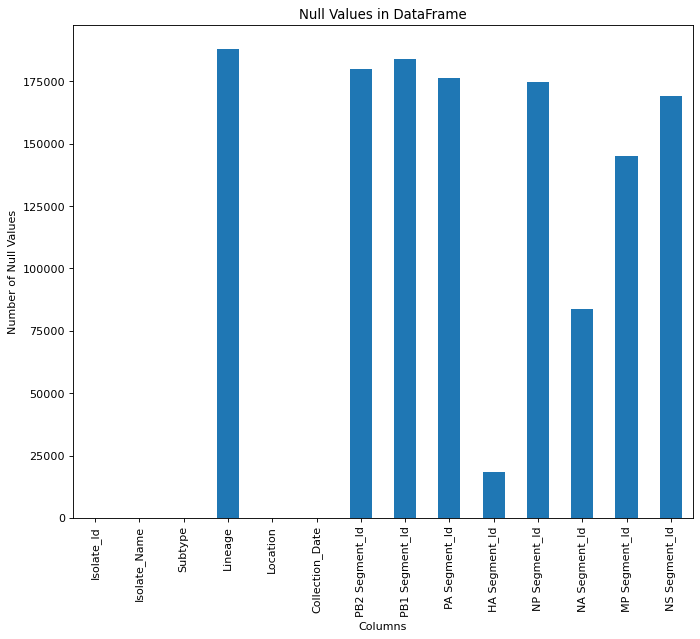

In [7]:
null = mod2.isnull().sum()
plt.figure(figsize=(10, 8), dpi=80)
null.plot(kind='bar')
plt.title('Null Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

In [8]:
# Adding two new columns to the existing dataframe.
# bydefault splitting is done on the basis of single space.
mod3['Species'] = mod3.Subtype.str.split('/', expand=True)[0]
# Adding two new columns to the existing dataframe.
# bydefault splitting is done on the basis of single space.
try:
    mod3['Type'] = mod3.Subtype.str.split('/', expand=True)[1]
except:
    mod3['Type'] = None

mod3.head()

C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\1750564737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod3['Species'] = mod3.Subtype.str.split('/', expand=True)[0]
C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\1750564737.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod3['Type'] = mod3.Subtype.str.split('/', expand=True)[1]


,Isolate_Id,Isolate_Name,Subtype,Lineage,Location,Collection_Date,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id,Species,Type
0,EPI_ISL_16810976,A/Petrozavodsk/CRIE/489/2023,A / H1N1,pdm09,Europe / Russian Federation / Republic of Karelia,2022-01-03,NaN,NaN,NaN,EPI2352050|489-H1N1-HANA_HA1,NaN,EPI2352043|489-H1N1-HANA_NA1,NaN,NaN,A,H1N1
1,EPI_ISL_16647787,A/South Africa/R06539/2022,B,Victoria,Africa / South Africa / Mpumalanga,2022-05-17,NaN,EPI2312582|A/South Africa/R06539/2022,EPI2312581|A/South Africa/R06539/2022,EPI2312579|A/South Africa/R06539/2022,NaN,EPI2312580|A/South Africa/R06539/2022,EPI2312584|A/South Africa/R06539/2022,EPI2312583|A/South Africa/R06539/2022,B,None
2,EPI_ISL_16647783,A/South Africa/R05932/2022,A / H1N1,pdm09,Africa / South Africa / Province of the Wester...,2022-05-20,EPI2312576|A/South Africa/R05932/2022,EPI2312575|A/South Africa/R05932/2022,EPI2312574|A/South Africa/R05932/2022,EPI2312567|A/South Africa/R05932/2022,EPI2312577|A/South Africa/R05932/2022,EPI2312570|A/South Africa/R05932/2022,EPI2312578|A/South Africa/R05932/2022,NaN,A,H1N1
3,EPI_ISL_16647781,A/South Africa/R05856/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-05-20,EPI2312562|A/South Africa/R05856/2022,EPI2312561|A/South Africa/R05856/2022,EPI2312560|A/South Africa/R05856/2022,EPI2312555|A/South Africa/R05856/2022,EPI2312558|A/South Africa/R05856/2022,EPI2312557|A/South Africa/R05856/2022,EPI2312556|A/South Africa/R05856/2022,EPI2312559|A/South Africa/R05856/2022,A,H1N1
4,EPI_ISL_16647739,A/South Africa/R07669/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-06-22,EPI2312550|A/South Africa/R07669/2022,EPI2312549|A/South Africa/R07669/2022,EPI2312551|A/South Africa/R07669/2022,EPI2312547|A/South Africa/R07669/2022,EPI2312554|A/South Africa/R07669/2022,EPI2312548|A/South Africa/R07669/2022,EPI2312552|A/South Africa/R07669/2022,EPI2312553|A/South Africa/R07669/2022,A,H1N1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318705,EPI_ISL_16236186,A/Austria/1573729/2022,A / H3N2,NaN,Europe / Austria / Bundesland Steiermark,2022-12-09,NaN,NaN,NaN,EPI2258539|A/Austria/1573729/2022,NaN,EPI2258540|A/Austria/1573729/2022,NaN,NaN,A,H3N2
318706,EPI_ISL_16236009,A/Austria/1573723/2022,A / H3N2,NaN,Europe / Austria / Bundesland Steiermark,2022-12-09,NaN,NaN,NaN,EPI2258537|A/Austria/1573723/2022,NaN,EPI2258538|A/Austria/1573723/2022,NaN,NaN,A,H3N2
318707,EPI_ISL_16236008,A/Austria/1573646/2022,A / H3N2,NaN,Europe / Austria / Bundesland Wien,2022-12-07,NaN,NaN,NaN,EPI2258535|A/Austria/1573646/2022,NaN,EPI2258536|A/Austria/1573646/2022,NaN,NaN,A,H3N2
318708,EPI_ISL_16236006,A/Austria/1573495/2022,A / H3N2,NaN,Europe / Austria / Burgenland,2022-12-07,NaN,NaN,NaN,EPI2258533|A/Austria/1573495/2022,NaN,EPI2258534|A/Austria/1573495/2022,NaN,NaN,A,H3N2


In [9]:
# Split to location columns
mod3['Continent'] = mod3.Location.str.split('/', expand=True)[0]
# Adding two new columns to the existing dataframe.
# bydefault splitting is done on the basis of single space.
try:
    mod3['Country'] = mod3.Location.str.split('/', expand=True)[1]
except:
    mod3['Country'] = None

try:
    mod3['Region'] = mod3.Location.str.split('/', expand=True)[2]
except:
    mod3['Region'] = None
mod3.head()

C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\3844064626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod3['Continent'] = mod3.Location.str.split('/', expand=True)[0]
C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\3844064626.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod3['Country'] = mod3.Location.str.split('/', expand=True)[1]
C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\3844064626.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Isolate_Id,Isolate_Name,Subtype,Lineage,Location,Collection_Date,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id,Species,Type,Continent,Country,Region
0,EPI_ISL_16810976,A/Petrozavodsk/CRIE/489/2023,A / H1N1,pdm09,Europe / Russian Federation / Republic of Karelia,2022-01-03,NaN,NaN,NaN,EPI2352050|489-H1N1-HANA_HA1,NaN,EPI2352043|489-H1N1-HANA_NA1,NaN,NaN,A,H1N1,Europe,Russian Federation,Republic of Karelia
1,EPI_ISL_16647787,A/South Africa/R06539/2022,B,Victoria,Africa / South Africa / Mpumalanga,2022-05-17,NaN,EPI2312582|A/South Africa/R06539/2022,EPI2312581|A/South Africa/R06539/2022,EPI2312579|A/South Africa/R06539/2022,NaN,EPI2312580|A/South Africa/R06539/2022,EPI2312584|A/South Africa/R06539/2022,EPI2312583|A/South Africa/R06539/2022,B,None,Africa,South Africa,Mpumalanga
2,EPI_ISL_16647783,A/South Africa/R05932/2022,A / H1N1,pdm09,Africa / South Africa / Province of the Wester...,2022-05-20,EPI2312576|A/South Africa/R05932/2022,EPI2312575|A/South Africa/R05932/2022,EPI2312574|A/South Africa/R05932/2022,EPI2312567|A/South Africa/R05932/2022,EPI2312577|A/South Africa/R05932/2022,EPI2312570|A/South Africa/R05932/2022,EPI2312578|A/South Africa/R05932/2022,NaN,A,H1N1,Africa,South Africa,Province of the Western Cape
3,EPI_ISL_16647781,A/South Africa/R05856/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-05-20,EPI2312562|A/South Africa/R05856/2022,EPI2312561|A/South Africa/R05856/2022,EPI2312560|A/South Africa/R05856/2022,EPI2312555|A/South Africa/R05856/2022,EPI2312558|A/South Africa/R05856/2022,EPI2312557|A/South Africa/R05856/2022,EPI2312556|A/South Africa/R05856/2022,EPI2312559|A/South Africa/R05856/2022,A,H1N1,Africa,South Africa,Gauteng
4,EPI_ISL_16647739,A/South Africa/R07669/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-06-22,EPI2312550|A/South Africa/R07669/2022,EPI2312549|A/South Africa/R07669/2022,EPI2312551|A/South Africa/R07669/2022,EPI2312547|A/South Africa/R07669/2022,EPI2312554|A/South Africa/R07669/2022,EPI2312548|A/South Africa/R07669/2022,EPI2312552|A/South Africa/R07669/2022,EPI2312553|A/South Africa/R07669/2022,A,H1N1,Africa,South Africa,Gauteng


In [10]:
# Split the date into year month day columns. The day column can probably be dropped
mod3['Collection_Year'] = mod3.Collection_Date.str.split('-', expand=True)[0]
# Adding two new columns to the existing dataframe.
# bydefault splitting is done on the basis of single space.
try:
    mod3['Collection_Month'] = mod3.Collection_Date.str.split('-', expand=True)[1]
except:
    mod3['Collection_Month'] = None
    
mod3.head()

C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\577639152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod3['Collection_Year'] = mod3.Collection_Date.str.split('-', expand=True)[0]
C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\577639152.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod3['Collection_Month'] = mod3.Collection_Date.str.split('-', expand=True)[1]


,Isolate_Id,Isolate_Name,Subtype,Lineage,Location,Collection_Date,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,...,NA Segment_Id,MP Segment_Id,NS Segment_Id,Species,Type,Continent,Country,Region,Collection_Year,Collection_Month
0,EPI_ISL_16810976,A/Petrozavodsk/CRIE/489/2023,A / H1N1,pdm09,Europe / Russian Federation / Republic of Karelia,2022-01-03,NaN,NaN,NaN,EPI2352050|489-H1N1-HANA_HA1,...,EPI2352043|489-H1N1-HANA_NA1,NaN,NaN,A,H1N1,Europe,Russian Federation,Republic of Karelia,2022,01
1,EPI_ISL_16647787,A/South Africa/R06539/2022,B,Victoria,Africa / South Africa / Mpumalanga,2022-05-17,NaN,EPI2312582|A/South Africa/R06539/2022,EPI2312581|A/South Africa/R06539/2022,EPI2312579|A/South Africa/R06539/2022,...,EPI2312580|A/South Africa/R06539/2022,EPI2312584|A/South Africa/R06539/2022,EPI2312583|A/South Africa/R06539/2022,B,None,Africa,South Africa,Mpumalanga,2022,05
2,EPI_ISL_16647783,A/South Africa/R05932/2022,A / H1N1,pdm09,Africa / South Africa / Province of the Wester...,2022-05-20,EPI2312576|A/South Africa/R05932/2022,EPI2312575|A/South Africa/R05932/2022,EPI2312574|A/South Africa/R05932/2022,EPI2312567|A/South Africa/R05932/2022,...,EPI2312570|A/South Africa/R05932/2022,EPI2312578|A/South Africa/R05932/2022,NaN,A,H1N1,Africa,South Africa,Province of the Western Cape,2022,05
3,EPI_ISL_16647781,A/South Africa/R05856/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-05-20,EPI2312562|A/South Africa/R05856/2022,EPI2312561|A/South Africa/R05856/2022,EPI2312560|A/South Africa/R05856/2022,EPI2312555|A/South Africa/R05856/2022,...,EPI2312557|A/South Africa/R05856/2022,EPI2312556|A/South Africa/R05856/2022,EPI2312559|A/South Africa/R05856/2022,A,H1N1,Africa,South Africa,Gauteng,2022,05
4,EPI_ISL_16647739,A/South Africa/R07669/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-06-22,EPI2312550|A/South Africa/R07669/2022,EPI2312549|A/South Africa/R07669/2022,EPI2312551|A/South Africa/R07669/2022,EPI2312547|A/South Africa/R07669/2022,...,EPI2312548|A/South Africa/R07669/2022,EPI2312552|A/South Africa/R07669/2022,EPI2312553|A/South Africa/R07669/2022,A,H1N1,Africa,South Africa,Gauteng,2022,06


In [29]:
# identify unique lineage names and counts
lineage_counts = mod3['Lineage'].value_counts(dropna = False)
lineage_counts

# add binary column for each lineage

# prepopulated the whole column with zeros
mod3['pdm09'] = 0
mod3['Victoria'] = 0
mod3['Yamagata'] = 0
mod3['seasonal'] = 0

# loop through and replace with 1 or None based on lineage value
# !!! CODE NOT WORKING !!!. The zeros are not being replaced (update: now they are all being replaced). It is also very slow, there may be a better way to do this.
for virus in mod3['Lineage']:
    if virus == 'pdm09':
        #print('I am swine flu') 
        # seems to work up to here
        mod3['pdm09'] = 1
    if virus == 'Victoria':
        mod3['Victoria'] = 1
    if virus == 'Yamagata':
        mod3['Yamagata'] = 1
    if virus == 'seasonal':
        mod3['seasonal'] = 1
    if virus == None:
        mod3['pdm09'] = None
        mod3['Victoria'] = None
        mod3['Yamagata'] = None
        mod3['seasonal'] = None
        
mod3.head()

C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\1856051464.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod3['pdm09'] = 0
C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\1856051464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod3['Victoria'] = 0
C:\Users\hanna\AppData\Local\Temp\ipykernel_32420\1856051464.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Isolate_Id,Isolate_Name,Subtype,Lineage,Location,Collection_Date,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,...,Type,Continent,Country,Region,Collection_Year,Collection_Month,pdm09,Victoria,Yamagata,seasonal
0,EPI_ISL_16810976,A/Petrozavodsk/CRIE/489/2023,A / H1N1,pdm09,Europe / Russian Federation / Republic of Karelia,2022-01-03,NaN,NaN,NaN,EPI2352050|489-H1N1-HANA_HA1,...,H1N1,Europe,Russian Federation,Republic of Karelia,2022,01,1,1,1,1
1,EPI_ISL_16647787,A/South Africa/R06539/2022,B,Victoria,Africa / South Africa / Mpumalanga,2022-05-17,NaN,EPI2312582|A/South Africa/R06539/2022,EPI2312581|A/South Africa/R06539/2022,EPI2312579|A/South Africa/R06539/2022,...,None,Africa,South Africa,Mpumalanga,2022,05,1,1,1,1
2,EPI_ISL_16647783,A/South Africa/R05932/2022,A / H1N1,pdm09,Africa / South Africa / Province of the Wester...,2022-05-20,EPI2312576|A/South Africa/R05932/2022,EPI2312575|A/South Africa/R05932/2022,EPI2312574|A/South Africa/R05932/2022,EPI2312567|A/South Africa/R05932/2022,...,H1N1,Africa,South Africa,Province of the Western Cape,2022,05,1,1,1,1
3,EPI_ISL_16647781,A/South Africa/R05856/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-05-20,EPI2312562|A/South Africa/R05856/2022,EPI2312561|A/South Africa/R05856/2022,EPI2312560|A/South Africa/R05856/2022,EPI2312555|A/South Africa/R05856/2022,...,H1N1,Africa,South Africa,Gauteng,2022,05,1,1,1,1
4,EPI_ISL_16647739,A/South Africa/R07669/2022,A / H1N1,pdm09,Africa / South Africa / Gauteng,2022-06-22,EPI2312550|A/South Africa/R07669/2022,EPI2312549|A/South Africa/R07669/2022,EPI2312551|A/South Africa/R07669/2022,EPI2312547|A/South Africa/R07669/2022,...,H1N1,Africa,South Africa,Gauteng,2022,06,1,1,1,1


In [30]:
# drop parsed columns. Leaving original lineage column in, it might be easier to label things that way.
cleaned = mod3.drop(['Collection_Date', 'Subtype', 'Location'], axis = 1)
cleaned.head()
cols = cleaned.columns

# reorder the columns
cleaned = cleaned[['Isolate_Id', 'Isolate_Name', 'Lineage', 'Species', 'Type',
       'Continent', 'Country', 'Region', 'Collection_Year', 'Collection_Month',
       'pdm09', 'Victoria', 'Yamagata', 'seasonal']]
cleaned.head()

,Isolate_Id,Isolate_Name,Lineage,Species,Type,Continent,Country,Region,Collection_Year,Collection_Month,pdm09,Victoria,Yamagata,seasonal
0,EPI_ISL_16810976,A/Petrozavodsk/CRIE/489/2023,pdm09,A,H1N1,Europe,Russian Federation,Republic of Karelia,2022,01,1,1,1,1
1,EPI_ISL_16647787,A/South Africa/R06539/2022,Victoria,B,None,Africa,South Africa,Mpumalanga,2022,05,1,1,1,1
2,EPI_ISL_16647783,A/South Africa/R05932/2022,pdm09,A,H1N1,Africa,South Africa,Province of the Western Cape,2022,05,1,1,1,1
3,EPI_ISL_16647781,A/South Africa/R05856/2022,pdm09,A,H1N1,Africa,South Africa,Gauteng,2022,05,1,1,1,1
4,EPI_ISL_16647739,A/South Africa/R07669/2022,pdm09,A,H1N1,Africa,South Africa,Gauteng,2022,06,1,1,1,1


In [31]:
# Final cleaned main dataset for analysis
cleaned.to_csv('cleaned_data_20230323.csv')

In [32]:
# Write supplementary files

# supplementary file that will link data by isolate id to the genomic data in fasta files for a genomic analysis
# We will not use this much in our analysis, but would hand it off as a deliverable for whomever would be running the analysis
# I (hv) plan to do at lease one exploratory figure on this to check for genome completeness
segment_ids = mod3[['Isolate_Id', 'PB2 Segment_Id',
       'PB1 Segment_Id', 'PA Segment_Id', 'HA Segment_Id', 'NP Segment_Id',
       'NA Segment_Id', 'MP Segment_Id', 'NS Segment_Id']]

segment_ids.to_csv('segment_ids.csv')
segment_ids.head()

,Isolate_Id,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id
0,EPI_ISL_16810976,NaN,NaN,NaN,EPI2352050|489-H1N1-HANA_HA1,NaN,EPI2352043|489-H1N1-HANA_NA1,NaN,NaN
1,EPI_ISL_16647787,NaN,EPI2312582|A/South Africa/R06539/2022,EPI2312581|A/South Africa/R06539/2022,EPI2312579|A/South Africa/R06539/2022,NaN,EPI2312580|A/South Africa/R06539/2022,EPI2312584|A/South Africa/R06539/2022,EPI2312583|A/South Africa/R06539/2022
2,EPI_ISL_16647783,EPI2312576|A/South Africa/R05932/2022,EPI2312575|A/South Africa/R05932/2022,EPI2312574|A/South Africa/R05932/2022,EPI2312567|A/South Africa/R05932/2022,EPI2312577|A/South Africa/R05932/2022,EPI2312570|A/South Africa/R05932/2022,EPI2312578|A/South Africa/R05932/2022,NaN
3,EPI_ISL_16647781,EPI2312562|A/South Africa/R05856/2022,EPI2312561|A/South Africa/R05856/2022,EPI2312560|A/South Africa/R05856/2022,EPI2312555|A/South Africa/R05856/2022,EPI2312558|A/South Africa/R05856/2022,EPI2312557|A/South Africa/R05856/2022,EPI2312556|A/South Africa/R05856/2022,EPI2312559|A/South Africa/R05856/2022
4,EPI_ISL_16647739,EPI2312550|A/South Africa/R07669/2022,EPI2312549|A/South Africa/R07669/2022,EPI2312551|A/South Africa/R07669/2022,EPI2312547|A/South Africa/R07669/2022,EPI2312554|A/South Africa/R07669/2022,EPI2312548|A/South Africa/R07669/2022,EPI2312552|A/South Africa/R07669/2022,EPI2312553|A/South Africa/R07669/2022
